In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
#dataset link: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
df = pd.read_csv('/content/drive/MyDrive/NN/Lab 2/diabetes.csv')
df.sample(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
192,7,159,66,0,0,30.4,0.383,36,1
515,3,163,70,18,105,31.6,0.268,28,1
362,5,103,108,37,0,39.2,0.305,65,0
602,1,124,74,36,0,27.8,0.100,30,0
629,4,94,65,22,0,24.7,0.148,21,0
614,11,138,74,26,144,36.1,0.557,50,1
672,10,68,106,23,49,35.5,0.285,47,0
554,1,84,64,23,115,36.9,0.471,28,0
603,7,150,78,29,126,35.2,0.692,54,1
174,2,75,64,24,55,29.7,0.370,33,0


In [31]:
df.shape

(768, 9)

In [32]:
X = df.iloc[:,:-1] # : means all the rows, -1 means deducted the last col
y = df['Outcome']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [35]:
y_train.shape, y_test.shape

((614,), (154,))

In [49]:
model = Sequential() # 10,1
model.add(Dense(5,activation='relu',input_shape=(8,)))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # binary, softmax

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train,epochs=5)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4811 - loss: 7.9894
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4146 - loss: 6.4777 
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4292 - loss: 3.9104 
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4407 - loss: 2.2305 
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4652 - loss: 1.1584 


In [53]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5199 - loss: 1.1449  


[1.2107826471328735, 0.5324675440788269]

In [54]:
history = model.fit(X_train, y_train,epochs=50,validation_data=(X_test,y_test)) # batch_size=32

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4454 - loss: 1.1097 - val_accuracy: 0.5325 - val_loss: 0.9968
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4524 - loss: 0.8605 - val_accuracy: 0.5260 - val_loss: 0.8818
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4377 - loss: 0.8541 - val_accuracy: 0.5260 - val_loss: 0.8494
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4248 - loss: 0.8531 - val_accuracy: 0.5195 - val_loss: 0.8265
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4365 - loss: 0.8290 - val_accuracy: 0.6429 - val_loss: 0.8051
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6261 - loss: 0.7775 - val_accuracy: 0.6429 - val_loss: 0.7901
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6396 - loss: 0.7835 - val_accuracy: 0.6429 - val_loss: 0.7749
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6512 - loss: 0.7655 - val_accuracy: 0.6429 - val_loss:

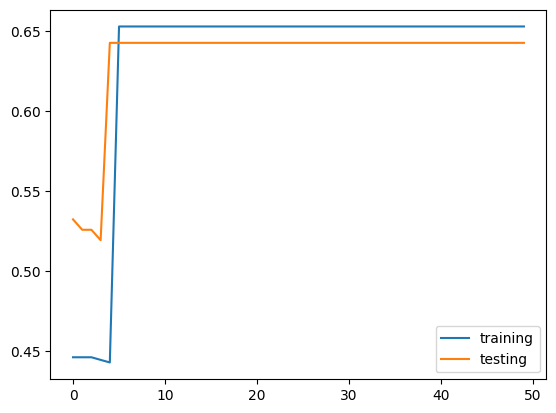

In [55]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='testing')
plt.legend()